In [1]:
###################### Data Manipulation ####################

import pandas as pd
import numpy as np

###################### Data Visualization ###################

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
################# Load Data ####################
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000
Survey = pd.read_csv(r"C:\Users\kseni\Documents\Dataset\brfss_for_bda_2021.csv", encoding='cp1252',low_memory=False)
print(Survey.columns)

Index(['_STATE', '_GEOSTR', '_DENSTR2', 'PRECALL', 'SECSCRFL', 'REPNUM',
       'REPDEPTH', 'FMONTH', 'IDATE', 'IMONTH',
       ...
       'PPS_45', 'PPS_46', 'PPS_48', 'PPS_52', 'childage', 'cracorg1',
       '_prace1', 'mracasc1', '_impcty', 'mracorg1'],
      dtype='object', length=414)


In [3]:
#Research Question 3: 
    #Is there a relationship between the BMI level and the diabetes of an adult in the US?

RQ3 = Survey[['_BMI5CAT','DIABETE3']]
RQ3 = RQ3.rename({'_BMI5CAT': 'BMI level', 'DIABETE3': 'Level of Diabetese'}, axis=1)


#Writing a dataframe to excel
datatoexcel = pd.ExcelWriter(r'C:\Users\kseni\Documents\Dataset\Q3.xlsx')
  
# write DataFrame to excel
RQ3.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

#RQ3.info()
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in RQ3:
    if (is_string_dtype(RQ3[col])):
        print(RQ3[col].name)
        print(RQ3[col].unique())
        RQ3[col][RQ3[col].str.contains('Missing|Not Sure|Refused')] = np.nan
        print(RQ3[col].unique())


DataFrame is written to Excel File successfully.
BMI level
['Normal Weight' 'Obese' 'Overweight' 'Underweight'
 "Don't know/Refused/Missing"]
['Normal Weight' 'Obese' 'Overweight' 'Underweight' nan]
Level of Diabetese
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy' 'Refused'
 "Don't know/Not Sure"]
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy' nan]


BMI level             1074
Level of Diabetese      13
dtype: int64


<AxesSubplot:>

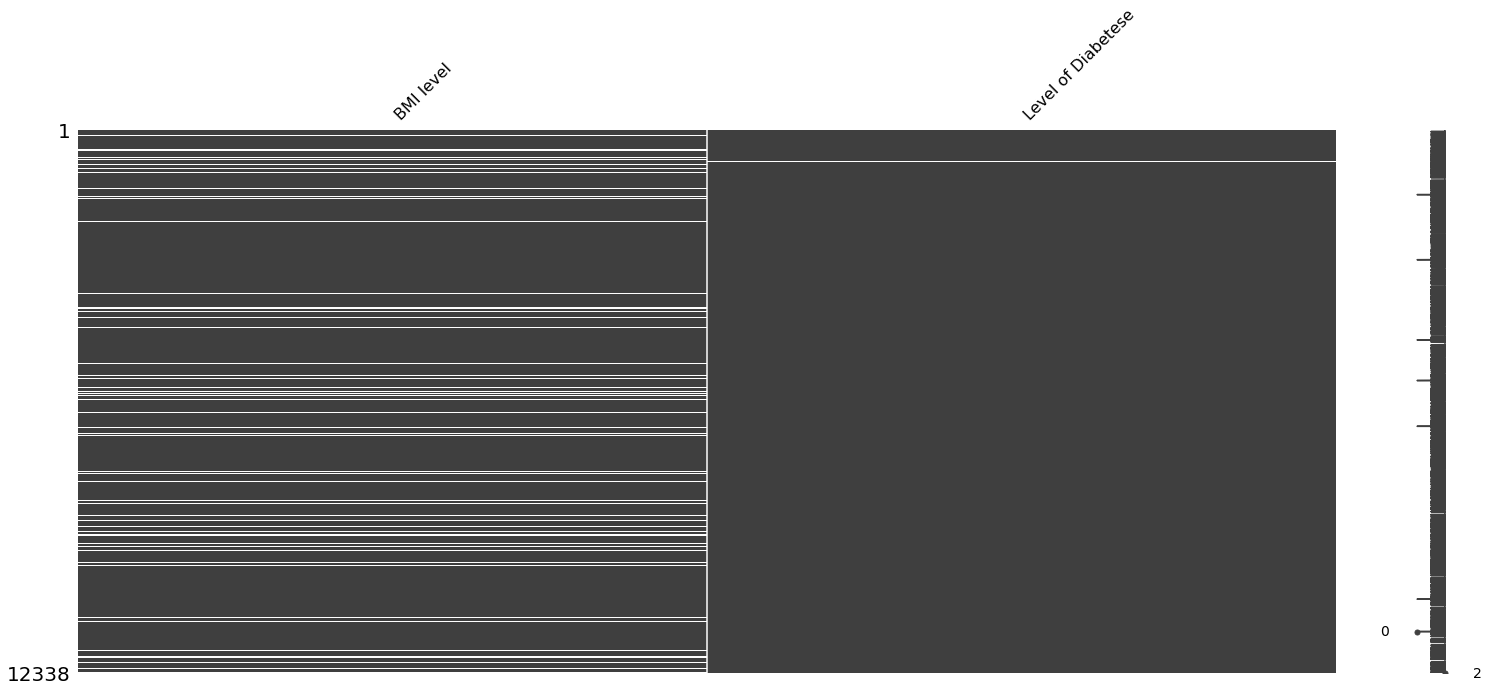

In [5]:
# Checking missing values

print(RQ3.isnull().sum())

import missingno as msno
msno.matrix(RQ3)

In [16]:
RQ3.info()

# Removing the rows which its class variable contains null values
RQ3 = RQ3[RQ3['BMI level'].notna()]
RQ3 = RQ3[RQ3['Level of Diabetese'].notna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11258 entries, 0 to 12337
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BMI level           11258 non-null  object
 1   Level of Diabetese  11258 non-null  object
dtypes: object(2)
memory usage: 263.9+ KB


BMI level             0
Level of Diabetese    0
dtype: int64


<AxesSubplot:>

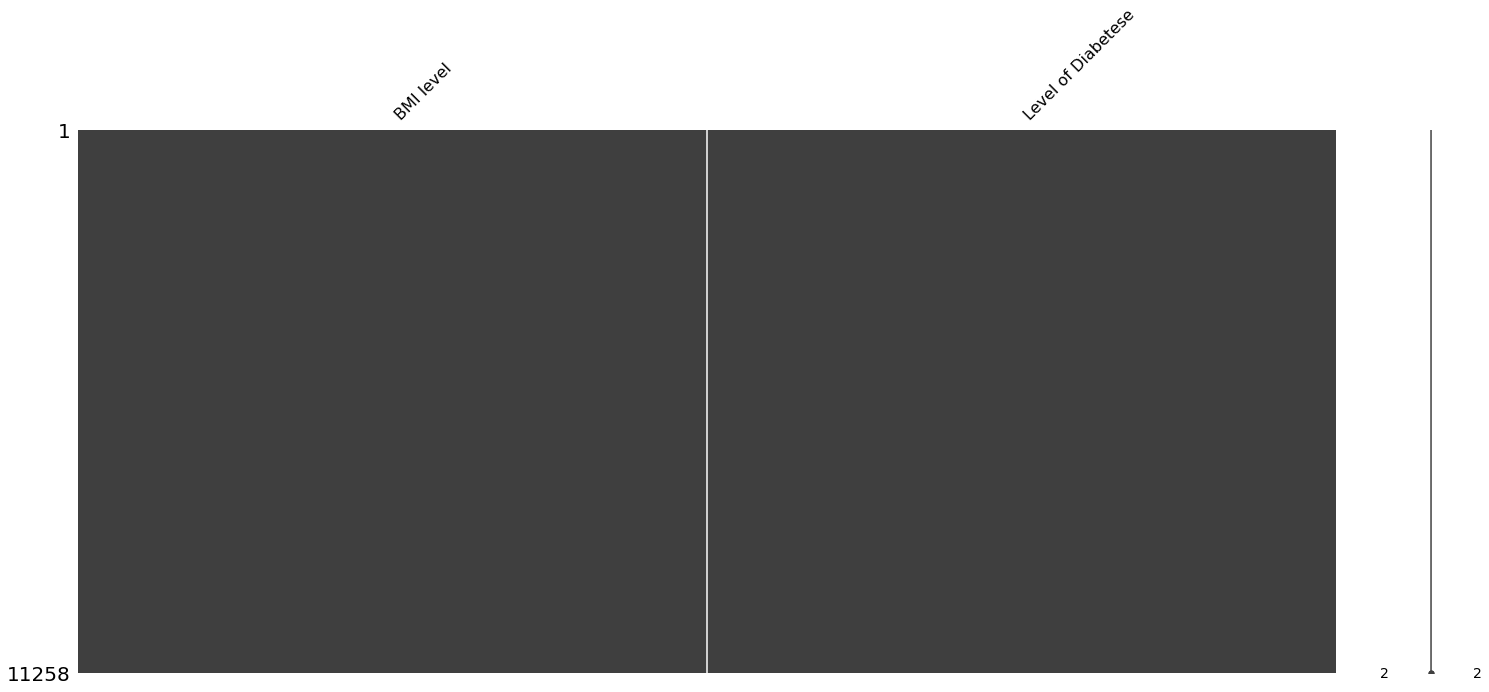

In [7]:
print(RQ3.isnull().sum())

import missingno as msno
msno.matrix(RQ3)

In [8]:
RQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11258 entries, 0 to 12337
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BMI level           11258 non-null  object
 1   Level of Diabetese  11258 non-null  object
dtypes: object(2)
memory usage: 263.9+ KB


In [9]:
print(RQ3[col].unique())

['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy']


In [11]:
crosstab = pd.crosstab(RQ3['BMI level'], RQ3['Level of Diabetese'])
crosstab

Level of Diabetese,No,"No, pre-diabetes or borderline diabetes",Yes,"Yes, but female told only during pregnancy"
BMI level,,,,
Normal Weight,3829,30,234,22
Obese,2164,75,673,20
Overweight,3483,54,437,28
Underweight,202,2,5,0


<AxesSubplot:xlabel='BMI level'>

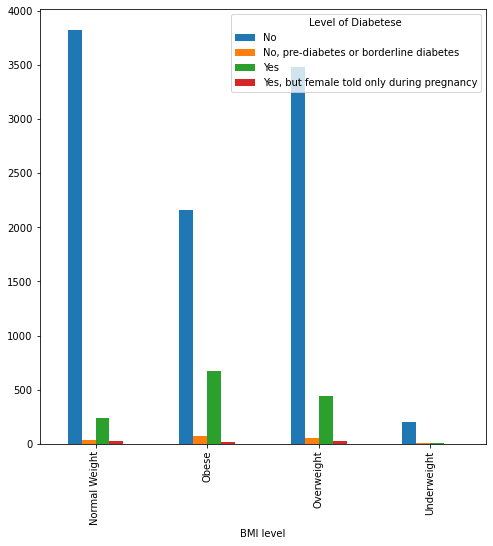

In [12]:
crosstab.plot.bar(figsize=(8,8))

<AxesSubplot:xlabel='BMI level'>

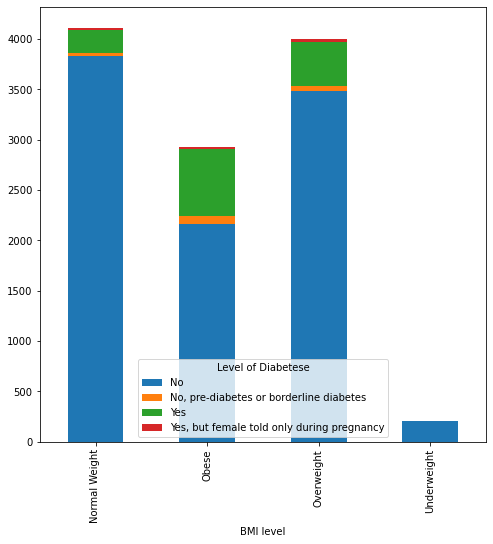

In [13]:
crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [14]:

stat, p, dof, expected = stats.chi2_contingency(crosstab)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
print(expected)

p value is 2.990816817070346e-117
Dependent (reject H0)
[[3.53748179e+03 5.88483745e+01 4.93083585e+02 2.55862498e+01]
 [2.52050950e+03 4.19303606e+01 3.51329543e+02 1.82305916e+01]
 [3.44034074e+03 5.72323681e+01 4.79543258e+02 2.48836383e+01]
 [1.79667969e+02 2.98889678e+00 2.50436134e+01 1.29952034e+00]]


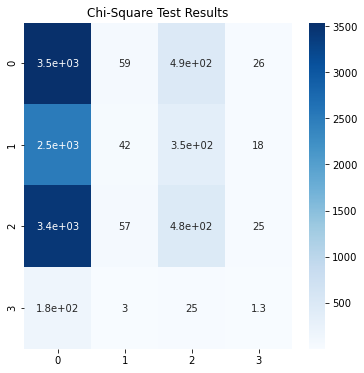

In [15]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(expected, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()